# UNN Machine Learning

## Lab

Этот набор данных для Pokemon-ов, который включает в себя:

Name: Название каждого покемона

Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам

Type 2: некоторые покемоны имеют двойной тип

базовую статистику:

a) Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон

b) HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока

c) Attack: базовый модификатор для обычных атак (например, Scratch, Punch)

d) Defense: сопротивление базовому урону от обычных атак

e) SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)

f) SP Def: сопротивление базового урона от специальных атак

g) Speed: скорость атаки

так же для кажого покемона указано:

a) поколение (generation)

b) легендарность (legendary)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import csv as cs
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

## Data loading

In [9]:
data = pd.read_csv('pokemon.csv', sep = ',', engine = 'python')
type(data)

pandas.core.frame.DataFrame

In [10]:
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## Data analysis

In [11]:
print(data.shape)

(800, 12)


In [12]:
cols = list(data.columns.values)
print(cols)

['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


In [13]:
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Корреляция признаков

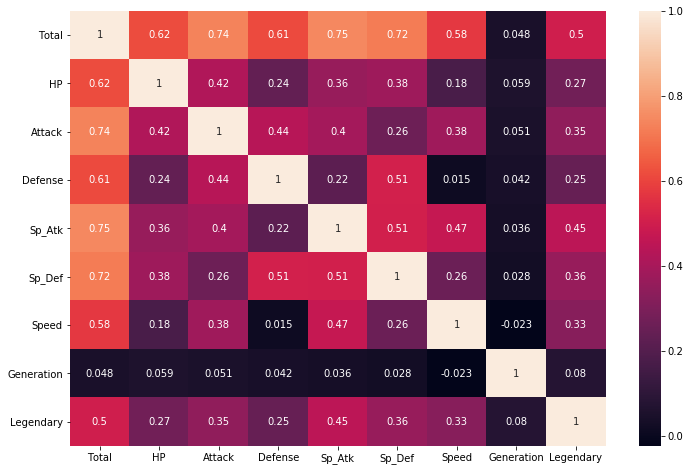

In [18]:
plt.figure(figsize=(12,8))
sbn.heatmap(data.corr(),annot=True) 
plt.show()

In [19]:
data.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp_Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp_Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Зависимость скорости атаки от типа покемона:

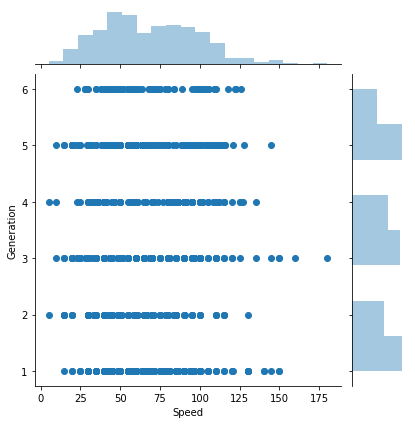

In [20]:
sbn.jointplot(x="Speed", y="Generation", data=data)

Зависимость между скоростью покемона и поколением отсутствует.

Зависимость сопротивления против специальних атак от сопротивления:

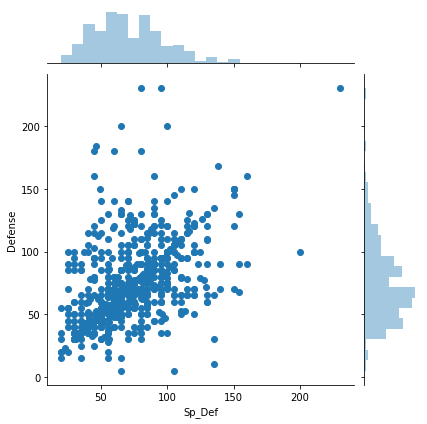

In [21]:
sbn.jointplot(x="Sp_Def", y="Defense", data=data)

Количество покемонов в каждом типе

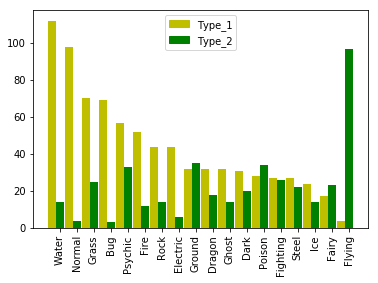

In [22]:
vals1 = [data['Type_1'].value_counts()[key] for key in data['Type_1'].value_counts().index]
vals2 = [data['Type_2'].value_counts()[key] for key in data['Type_1'].value_counts().index]
inds = np.arange(len(data['Type_1'].value_counts().index))
width = .45
handles = [ptc.Patch(color='y', label='Type_1'), ptc.Patch(color='g', label='Type_2')]
plt.bar(inds, vals1, width, color='y')
plt.bar(inds+width, vals2, width, color='g')
plt.gca().set_xticklabels(data['Type_1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)
pass

Total для легендарных покемонов по отдельным типам: